In [3]:
import pandas as pd
from flask import Flask,request,jsonify

In [86]:
doctor_df=pd.read_csv("docinfo.csv")
specialization_df=pd.read_csv("dataset.csv")
doctor_df

,id,name,specialization,hospital,state,city,experience,rating,contact
0,1,Dr.Anjali Pandey,Cardiology,Harmony Health Hub,Assam,Guwahati,14,1.4,9330506495
1,2,Dr.Ritu Jain,Addiction Medicine,Apollo MedCenter,Karnataka,Bengaluru,13,4.2,9373643907
2,3,Dr.Isha Patel,Pulmonology,Harmony Health Hub,West Bengal,Kolkata,5,4.6,9921926417
3,4,Dr.Arjun Iyer,Addiction Medicine,Medicover Clinic,Bihar,Patna,8,1.6,9960410302
4,5,Dr.Geeta Shetty,Dentistry,Healing Touch Hospital,Rajasthan,Jaipur,25,2.1,9519376968
...,...,...,...,...,...,...,...,...,...
295,296,Dr.Priya Singh,Cardiology,Lotus Health Institute,Madhya Pradesh,Bhopal,4,1.1,9261822762
296,297,Dr.Anjali Choudhary,Psychiatry,CityCare Hospital,Delhi,Delhi,6,3.4,9115132311
297,298,Dr.Amit Joshi,General Surgery,Medicover Clinic,Jammu & Kashmir,Jammu,28,0.8,9881357448
298,299,Dr.Deepika Naidu,Orthopedics,Narayana Health,Gujarat,Surat,5,2.6,9751946386


In [76]:
disease='Endocarditis'
city='Noida'

specRow=specialization_df[specialization_df['Disease'].str.strip().str.lower()==disease.strip().lower()] 
specRow

,Disease,Specialization
127,Endocarditis,Cardiology


In [77]:
specRow.iloc[0]

Disease           Endocarditis
Specialization      Cardiology
Name: 127, dtype: object

In [78]:
specialization=specRow.iloc[0]['Specialization']

In [87]:
doctor_df.sort_values(by=['rating','experience'],ascending=[False,False])

,id,name,specialization,hospital,state,city,experience,rating,contact
125,126,Dr.Preeti Shetty,Orthopedics,Sanjeevani Hospital,Maharashtra,Pune,25,5.0,9221989782
235,236,Dr.Neha Khan,Dentistry,Sanjeevani Hospital,Uttar Pradesh,Noida,14,5.0,9213917024
281,282,Dr.Raj Choudhary,Rheumatology,Divine Heart Hospital,Tamil Nadu,Chennai,14,5.0,9059578171
73,74,Dr.Reshma Reddy,Ophthalmology,Vidyasagar Hospital,Jammu & Kashmir,Jammu,8,5.0,9435755459
71,72,Dr.Sneha Dwivedi,General Surgery,Ayushman Super Specialty,Tamil Nadu,Chennai,23,4.9,9393515646
...,...,...,...,...,...,...,...,...,...
226,227,Dr.Priya Dutta,Orthopedics,Care Plus Hospital,Kerala,Kochi,28,0.2,9432784711
90,91,Dr.Deepika Nair,Infectious Disease,CureWell Multispecialty,Kerala,Kochi,20,0.2,9241815945
57,58,Dr.Ritu Mishra,Endocrinology,Shanti Wellness Hospital,Delhi,Delhi,17,0.2,9637730402
269,270,Dr.Aditya Mishra,Endocrinology,Apollo MedCenter,Tamil Nadu,Chennai,17,0.2,9243812715


In [71]:
doctor_df['score']=doctor_df['rating']*0.7 + doctor_df['experience']*0.3
doctor_df.sort_values(by=['specialization','score'],ascending=[True,False])

,id,name,specialization,hospital,state,city,experience,rating,contact,score
26,27,Dr.Vikram Bhattacharya,Addiction Medicine,Healing Touch Hospital,Karnataka,Bengaluru,27,4.0,9357746364,10.90
280,281,Dr.Rohit Pillai,Addiction Medicine,Ayushman Super Specialty,Rajasthan,Jaipur,24,3.8,9166525734,9.86
261,262,Dr.Anil Kulkarni,Addiction Medicine,Care Plus Hospital,Delhi,Delhi,22,2.7,9155578752,8.49
35,36,Dr.Amit Tiwari,Addiction Medicine,Divine Heart Hospital,Madhya Pradesh,Bhopal,22,2.6,9102810619,8.42
31,32,Dr.Priya Mishra,Addiction Medicine,Apollo MedCenter,Karnataka,Bengaluru,18,3.4,9050459914,7.78
...,...,...,...,...,...,...,...,...,...,...
218,219,Dr.Vikram Desai,Vascular Surgery,CureWell Multispecialty,Tamil Nadu,Chennai,19,1.6,9429778670,6.82
63,64,Dr.Amit Dwivedi,Vascular Surgery,Narayana Health,Maharashtra,Pune,14,0.6,9125282562,4.62
240,241,Dr.Karan Saxena,Vascular Surgery,Vidyasagar Hospital,Maharashtra,Pune,12,0.8,9423332959,4.16
258,259,Dr.Raj Nair,Vascular Surgery,Ayushman Super Specialty,Maharashtra,Mumbai,9,0.9,9295832260,3.33


In [88]:
filtered=doctor_df[(doctor_df['city'].str.strip().str.lower()==city.strip().lower()) & (doctor_df['specialization'].str.strip().str.lower()==specialization.strip().lower())]
filtered

,id,name,specialization,hospital,state,city,experience,rating,contact
32,33,Dr.Reshma Kapoor,Cardiology,Shanti Wellness Hospital,Uttar Pradesh,Noida,9,3.7,9648790558
112,113,Dr.Aditya Mohanty,Cardiology,Harmony Health Hub,Uttar Pradesh,Noida,9,1.5,9968564999


In [89]:
filtered['score']=filtered['rating']*0.7 + filtered['experience']*0.3
filtered

C:\Users\HP\AppData\Local\Temp\ipykernel_16944\2263200706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['score']=filtered['rating']*0.7 + filtered['experience']*0.3


,id,name,specialization,hospital,state,city,experience,rating,contact,score
32,33,Dr.Reshma Kapoor,Cardiology,Shanti Wellness Hospital,Uttar Pradesh,Noida,9,3.7,9648790558,5.29
112,113,Dr.Aditya Mohanty,Cardiology,Harmony Health Hub,Uttar Pradesh,Noida,9,1.5,9968564999,3.75


In [90]:
recommended=filtered.sort_values(by=['specialization','score'],ascending=[True,False])
recommended

,id,name,specialization,hospital,state,city,experience,rating,contact,score
32,33,Dr.Reshma Kapoor,Cardiology,Shanti Wellness Hospital,Uttar Pradesh,Noida,9,3.7,9648790558,5.29
112,113,Dr.Aditya Mohanty,Cardiology,Harmony Health Hub,Uttar Pradesh,Noida,9,1.5,9968564999,3.75


## Extra - top doctors in specialization

In [107]:
max_rate_df=doctor_df.groupby(['specialization'])['rating'].max().reset_index()
max_rate_df

,specialization,rating
0,Addiction Medicine,4.2
1,Cardiology,4.8
2,Dentistry,5.0
3,Dermatology,4.0
4,Endocrinology,4.6
5,Gastroenterology,4.6
6,General Medicine,4.8
7,General Surgery,4.9
8,Gynecology,4.4
9,Hematology,4.9


In [93]:
import matplotlib.pyplot as plt
import seaborn as db

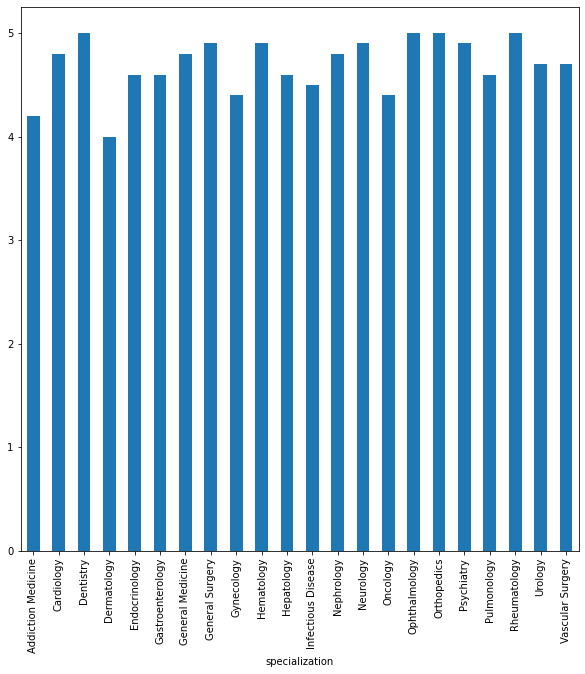

In [105]:
max_rate_df.plot(kind='bar',x='specialization',y='rating', figsize=(10,10))
plt.show()